Best alpha: 0.1
Accuracy: 0.6623376623376623
Training set performance is:
               precision    recall  f1-score   support

           0       0.70      0.69      0.69       401
           1       0.43      0.45      0.44       213

    accuracy                           0.60       614
   macro avg       0.57      0.57      0.57       614
weighted avg       0.61      0.60      0.61       614

Test set performance is:
               precision    recall  f1-score   support

           0       0.73      0.75      0.74        99
           1       0.53      0.51      0.52        55

    accuracy                           0.66       154
   macro avg       0.63      0.63      0.63       154
weighted avg       0.66      0.66      0.66       154

Tables of confusion matrixes are tiered as training and test ones hereby:


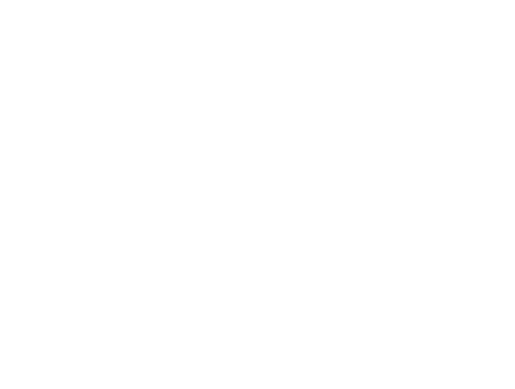

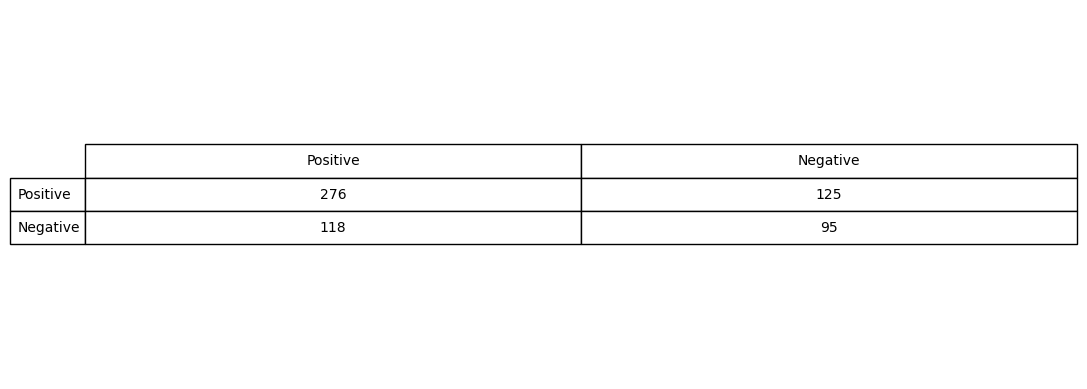

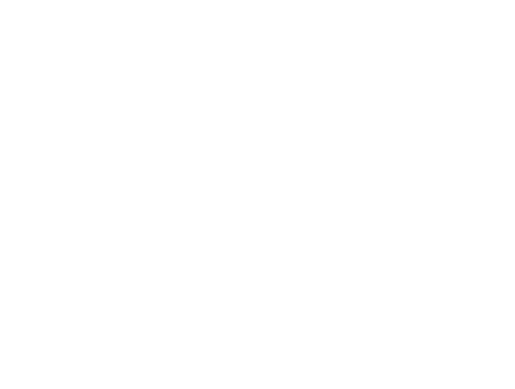

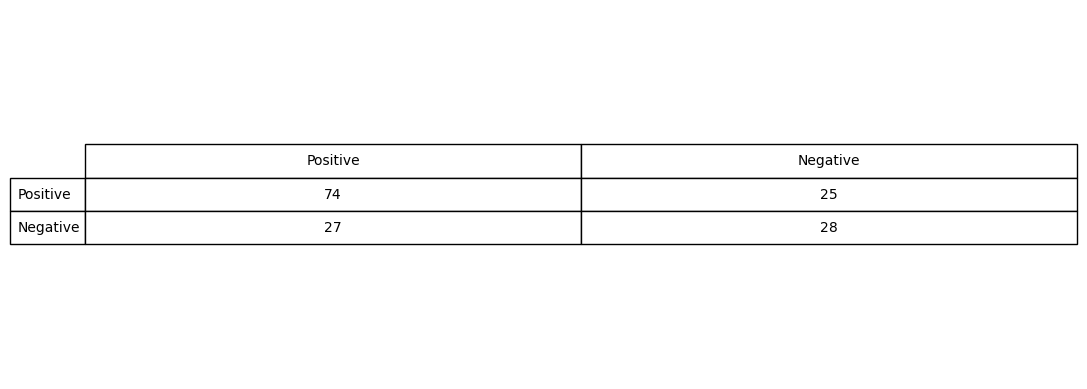

In [15]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd

def plotting_confusion_matrix(confusion_matrix,classes):
    """ 
    plotting the confusion matrix
    """
    fig,ax = plt.subplots()
    ax.axis('off')
    fig, ax = plt.subplots()
    ax.axis('off')
    
    table = ax.table(cellText=confusion_matrix,
                     rowLabels=classes,
                     colLabels=classes,
                     loc='center',
                     cellLoc='center')
    
    table.scale(2, 2)  
    
    plt.show()

# Load the dataset
df = pd.read_csv('C:\\Users\\ATC\\Desktop\\my_notebooks\\diabetes.csv')

# Separate features (X) and target (y)
X = df.drop(columns=['Outcome'])
y = df['Outcome']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()

# Define the parameter grid for grid search
param_grid = {'alpha': [0.1, 0.5, 1.0, 2.0, 5.0, 10.0]}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=nb_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best model and its hyperparameters
best_nb_classifier = grid_search.best_estimator_
best_alpha = grid_search.best_params_['alpha']

# Make predictions on the test set using the best model
y_train_pred = best_nb_classifier.predict(X_train)
y_test_pred = best_nb_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Best alpha:", best_alpha)
print("Accuracy:", accuracy)

print('Training set performance is:\n',classification_report(y_train,y_train_pred))
print('Test set performance is:\n', classification_report(y_test,y_test_pred))

print("Tables of confusion matrixes are tiered as training and test ones hereby:")
classes = ['Positive','Negative']
plotting_confusion_matrix(confusion_matrix(y_train,y_train_pred),classes)
plotting_confusion_matrix(confusion_matrix(y_test,y_test_pred),classes)